# <b><u> Project Title : Online Retail Customer Segmentation. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

# Importing libs and data

In [142]:
# importing libraris for data manipulation and plotting
import pandas as pd
import datetime as dt
import numpy as np
# import re

import matplotlib.pyplot as plt
import seaborn as sns



In [143]:
# setting Parameters for the plots

%matplotlib inline

plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})

In [145]:
# For splitting and scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [146]:
# importing kmeans
from sklearn.cluster import KMeans
# from sklearn.manifold import TSNE

In [ ]:
# for 3D plots
from mpl_toolkits import mplot3d
from ipywidgets import interact, interactive, fixed, interact_manual

In [167]:
# for silhouette plots
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [150]:
# ignoring warning for now
import warnings
warnings.filterwarnings('ignore')

In [151]:
# Mounting the google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [152]:
!pip install xlrd==1.2.0

# Exploration

In [11]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/1 Capstone projects/4. Capstone project ML Clustering/Customer Segmentation/Copy of Online Retail.xlsx')

In [12]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [13]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [15]:
df.describe(include = 'all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,23260,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,1114,NaN,NaN,495478
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN


In [16]:
for var in list(df.columns):
    print(var, ' contains ', df[var].nunique(), ' values')

InvoiceNo  contains  25900  values
StockCode  contains  4070  values
Description  contains  4223  values
Quantity  contains  722  values
InvoiceDate  contains  23260  values
UnitPrice  contains  1630  values
CustomerID  contains  4372  values
Country  contains  38  values


In [17]:
for var in list(df.columns):
  print(f'\n\nValue count for {var}:\n {df[var].value_counts()}')



Value count for InvoiceNo:
 573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
554023        1
554022        1
554021        1
554020        1
C558901       1
Name: InvoiceNo, Length: 25900, dtype: int64


Value count for StockCode:
 85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
21431        1
22275        1
17001        1
90187A       1
72759        1
Name: StockCode, Length: 4070, dtype: int64


Value count for Description:
 WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM        

In [18]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Initial Findings

* The max and min value of Quantity are both 80995; it could represent a reversal of data entry. However, the issue is that both the initial and reversal entry are retained in the dataset. Further investigation is needed to understand the nature and determine the best way to manage such data reversal.

* It is uncommon to have negative UnitPrice, as this would mean a cash outflow to a company. These transactions could represent cancelled orders by customers or bad-debt/write-off incurred by the business.

* The missing unique customers IDs could post a problem as market/customer segmentation requires grouping each unique customer into a group.

## Checking for missing and null values

In [19]:
# rows without description
df[df.Description.isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [20]:
# rows without customer ID
df[df.CustomerID.isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [21]:
# rows with price less than or equal to zero
df[(df.UnitPrice <= 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538554,581408,85175,NaN,20,2011-12-08 14:06:00,0.0,NaN,United Kingdom


In [22]:
# checking shape of df where customer ID is present but unit price is 0 or -ve.
df[(df.UnitPrice <= 0) & (df.CustomerID.notna())].shape

(40, 8)

In [23]:
# rows with -ve quantity (potentially bcoz of cancelled orders)
df[(df.Quantity < 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


## Univaraiate analysis

### InvoiceNo

In [24]:
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [25]:
df=df[~df['InvoiceNo'].str.contains('C')]

Removed Cancelled orders as they won't be helpful in segmenting customers as per their purchase behaviour

### CustomerID

In [26]:
df.isnull().sum(axis=0)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134697
Country             0
dtype: int64

There is a total of 132,602 rows (~25% of total data) with missing information on CustomerID. CustomerID holds the identity of the customer and without which, it will be impossible to perform customer segmentation. 

Therefore we have no option but to drop them from further analysis.

In [27]:
df = df[df.CustomerID.notnull()]

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


Along with null customerIDs, rows with no description are also gone.

In [29]:
df[(df.Quantity <= 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


Zero quantitiy rows are also no longer present in the dataset.

### UnitPrice

In [30]:
df[(df.UnitPrice <= 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410.0,United Kingdom


There are 40 rows with 0 unit price. It seems like a misc activities, more details needed for the same. But for further analysis we are dropping them as it won't be useful in further analysis.

In [31]:
df = df[df.UnitPrice != 0]

In [32]:
df[(df.UnitPrice <= 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


Dataset is all cleaned now!

### Country

In [34]:
df.Country.value_counts()

United Kingdom          354321
Germany                   9040
France                    8341
EIRE                      7236
Spain                     2484
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1462
Australia                 1182
Norway                    1071
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45
Lithuani

EIRE is Irish for Ireland and RSA is for South Africa.

USA will be replaced with United States.

There are 224 rows without country i.e. Unspecified. These rows will be imputed with the most frequent country: United Kingdom for now.

In [35]:
df.loc[df['Country'] == 'EIRE', 'Country'] = 'Ireland'
df.loc[df['Country'] == 'RSA', 'Country'] = 'South Africa'
df.loc[df['Country'] == 'USA', 'Country'] = 'United States'
df.loc[df['Country'] == 'Unspecified', 'Country'] = 'United Kingdom'

In [36]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [37]:
df['TotalAmt']=df['Quantity']*df['UnitPrice']

In [38]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmt
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
 8   TotalAmt     397884 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB


Added column with total amount

# Cohort analysis

In [40]:
df1 = df.copy()

In [41]:
df1['Date'] = df1['InvoiceDate'].dt.date
df1['Time'] = df1['InvoiceDate'].dt.time

# Remove InvoiceDate column
df1.drop(['InvoiceDate'], axis=1, inplace=True)

In [42]:
def get_month(x):
  '''
  get year and month values
  '''
  return dt.datetime(x.year,x.month,1)

In [43]:
df1['InvoiceMonth'] = df1['Date'].apply(get_month)

In [44]:
df1.InvoiceMonth.value_counts()

2011-11-01    64531
2011-10-01    49554
2011-09-01    40028
2011-05-01    28320
2011-06-01    27185
2011-03-01    27175
2011-08-01    27007
2011-07-01    26825
2010-12-01    26157
2011-04-01    22642
2011-01-01    21229
2011-02-01    19927
2011-12-01    17304
Name: InvoiceMonth, dtype: int64

In [45]:
#  cohort month is when particular CustomerID made 1st transaction
df1['CohortMonth'] = df1.groupby(['CustomerID'])['InvoiceMonth'].transform(min)

In [46]:
df1

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,TotalAmt,Date,Time,InvoiceMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30,2010-12-01,08:26:00,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00,2010-12-01,08:26:00,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00,2010-12-01,2010-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680.0,France,10.20,2011-12-09,12:50:00,2011-12-01,2011-08-01
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,12.60,2011-12-09,12:50:00,2011-12-01,2011-08-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,16.60,2011-12-09,12:50:00,2011-12-01,2011-08-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,16.60,2011-12-09,12:50:00,2011-12-01,2011-08-01


In [47]:
def div_date(dataframe, column):
    '''
    Divide date or extract year, month values from date

    '''
    year = dataframe[column].dt.year
    month = dataframe[column].dt.month
    return year, month

In [48]:
# Extract year, month from InvoiceMonth and CohortMonth

invoice_year, invoice_month = div_date(df1, 'InvoiceMonth')
cohort_year, cohort_month = div_date(df1, 'CohortMonth')

In [49]:
# Calculate the date difference between each transaction and first transaction by customer 
year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month

In [50]:
# Calculating the CohortIndex i.e. time offset in months
df1['CohortIndex'] = (year_diff * 12 + month_diff + 1)

In [51]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,TotalAmt,Date,Time,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30,2010-12-01,08:26:00,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00,2010-12-01,08:26:00,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00,2010-12-01,2010-12-01,1


## Retention Rate

In [52]:
# number of unique customers in each group
Retention_df = df1.groupby(['CohortMonth', 'CohortIndex']).CustomerID.nunique().reset_index()

In [53]:
Retention_df.head()

,CohortMonth,CohortIndex,CustomerID
0,2010-12-01,1,885
1,2010-12-01,2,324
2,2010-12-01,3,286
3,2010-12-01,4,340
4,2010-12-01,5,321


In [54]:
# pivot table for customer retention

p_table = Retention_df.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')
p_table

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
# Select the first column and store it to cohort_sizes
cohort_sizes = p_table.iloc[:,0]

# Calculate percentage of active customers in each cohort
retention_rate = p_table.divide(cohort_sizes, axis=0)

In [56]:
retention_rate.index = retention_rate.index.strftime('%Y-%m')

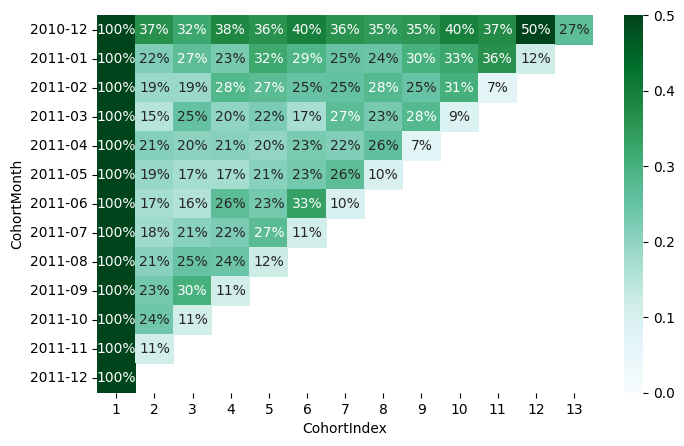

In [57]:
sns.heatmap(data=retention_rate, annot=True, fmt='.0%', vmin=0.0, vmax=0.5, cmap='BuGn')

Customer retention metric measures 2 things:
* How many customers are originally in each cohort (acquisition month)
* How many of them are still active in the following months

Approximately 25% of new customers acquired will make a repeat purchase, and this percentage remains fairly consistently barring occasionally increase and dips in activities.

# Recency, Frequency, and Monetary (RFM) Segmentation

Recency, frequency, monetary value is a marketing analysis tool used to identify a company's or an organization's best customers by using certain measures. The RFM model is based on three quantitative factors: . Frequency: How often a customer makes a purchase. Monetary Value: How much money a customer spends on

**Performing RFM Segmentation and RFM Analysis, Step by Step**
* The first step in building an RFM model is to assign Recency, Frequency and Monetary values to each customer.
* The second step is to divide the customer list into tiered groups for each of the three dimensions (R, F and M).

RFM is a behavioural customer segmentation for measuring customer value.

* Receny: How recent was each customer's last purchase
* Frequency: How many times the customer purchased in the last 12 months
* Monetary Value: How much has the customer spent in the last 12 months

**Calculating RFM scores**

The number is typically 3 or 5. If you decide to code each RFM attribute into 3 categories, you'll end up with 27 different coding combinations ranging from a high of 333 to a low of 111. Generally speaking, the higher the RFM score, the more valuable the customer.

In [58]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [59]:
# to calculate Receny let's take a day after last order date as reference date.
ref_date=max(df.InvoiceDate)+dt.timedelta(days=1)
ref_date

Timestamp('2011-12-10 12:50:00')

In [60]:
# getting R F M values
rfm_df = df.groupby('CustomerID').agg({'InvoiceDate':lambda x:(ref_date-x.max()).days,'InvoiceNo':'count', 'TotalAmt': 'sum'})

rfm_df.rename(columns={'InvoiceDate':'Recency', 'InvoiceNo': 'Frequency', 'TotalAmt': 'Monetary'},inplace=True)

In [61]:
# rfm_df = rfm_df.reset_index()
rfm_df

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,12,178.05


In [62]:
rfm_df['R_score'] = pd.qcut(rfm_df['Recency'],4,labels=[4,3,2,1])

rfm_df['F_score'] = pd.qcut(rfm_df['Frequency'],4,labels=[1,2,3,4])

rfm_df['M_score'] = pd.qcut(rfm_df['Monetary'],4,labels=[1,2,3,4])

In [63]:
rfm_df['RFM_Group'] = (rfm_df['R_score'].astype(str)+ rfm_df['F_score'].astype(str) + rfm_df['M_score'].astype(str))

In [64]:
rfm_df['RFM_Score'] = rfm_df[['R_score', 'F_score', 'M_score']].sum(axis = 1)

In [65]:
# final df with RFM group, RFM score etc.
rfm_df

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Group,RFM_Score
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,6
12347.0,2,182,4310.00,4,4,4,444,12
12348.0,75,31,1797.24,2,2,4,224,8
12349.0,19,73,1757.55,3,3,4,334,10
12350.0,310,17,334.40,1,1,2,112,4
...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,111,3
18281.0,181,7,80.82,1,1,1,111,3
18282.0,8,12,178.05,4,1,1,411,6


In [66]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4338 entries, 12346.0 to 18287.0
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Recency    4338 non-null   int64   
 1   Frequency  4338 non-null   int64   
 2   Monetary   4338 non-null   float64 
 3   R_score    4338 non-null   category
 4   F_score    4338 non-null   category
 5   M_score    4338 non-null   category
 6   RFM_Group  4338 non-null   object  
 7   RFM_Score  4338 non-null   int64   
dtypes: category(3), float64(1), int64(3), object(1)
memory usage: 216.7+ KB


In [67]:
rfm_df.RFM_Score.value_counts()

5     516
6     460
7     459
8     454
12    447
10    426
9     417
11    392
3     385
4     382
Name: RFM_Score, dtype: int64

In [68]:
def get_segments(score):

    if score >= 11:
        return 'Diamond'
    elif score >= 9:
        return 'Platinum'
    elif score >= 7:
        return 'Gold'
    elif score >= 5:
        return 'Silver'
    else:
        return 'Bronze'

In [69]:
# segmenting customers based on their scores
rfm_df['Segments'] = rfm_df['RFM_Score'].apply(get_segments)

In [70]:
rfm_df

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Group,RFM_Score,Segments
CustomerID,,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,6,Silver
12347.0,2,182,4310.00,4,4,4,444,12,Diamond
12348.0,75,31,1797.24,2,2,4,224,8,Gold
12349.0,19,73,1757.55,3,3,4,334,10,Platinum
12350.0,310,17,334.40,1,1,2,112,4,Bronze
...,...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,111,3,Bronze
18281.0,181,7,80.82,1,1,1,111,3,Bronze
18282.0,8,12,178.05,4,1,1,411,6,Silver


In [71]:
rfm_segments = rfm_df.groupby('Segments')['Segments'].count().reset_index(name='counts').sort_values('counts')
rfm_segments

,Segments,counts
0,Bronze,767
1,Diamond,839
3,Platinum,843
2,Gold,913
4,Silver,976


Text(0.5, 1.0, 'Customer Segments distribution')

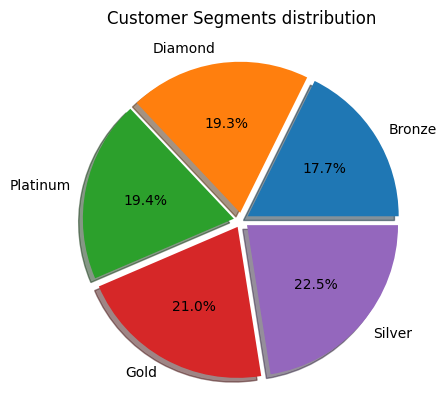

In [72]:
# pie plot
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
labels = rfm_segments.Segments
plt.pie(rfm_segments.counts, labels=labels, explode=explode, shadow=True, autopct='%1.1f%%')
plt.title('Customer Segments distribution', size=12)

# K-Means clustering

K-means gives the best result under the following conditions:

* Data’s distribution is not skewed (i.e. long-tail distribution)
* Data is standardised (i.e. mean of 0 and standard deviation of 1).

Why? because K-means group similar customers together based on their distance from centroids.

The location of each data point on the graph is determined by considering all information associated with the specific customer. If any of the information is not on the same distance scale, K-means might not form meaningful clusters.

Here are the exact steps to prepare the data before using K-mean:

* Plot distribution charts to check for skewness. If the data is skewed (i.e. has long-tail distribution), perform log transformation to reduce the skewness.
* Scale and centre the data to have a mean of 0 and variance of 1.

## Pre-processing

In [73]:
rfm_df.describe()

,Recency,Frequency,Monetary,RFM_Score
count,4338.000000,4338.000000,4338.000000,4338.000000
mean,92.536422,91.720609,2054.266460,7.505071
std,100.014169,228.785094,8989.230441,2.817089
min,1.000000,1.000000,3.750000,3.000000
25%,18.000000,17.000000,307.415000,5.000000
50%,51.000000,41.000000,674.485000,7.000000
75%,142.000000,100.000000,1661.740000,10.000000
max,374.000000,7847.000000,280206.020000,12.000000


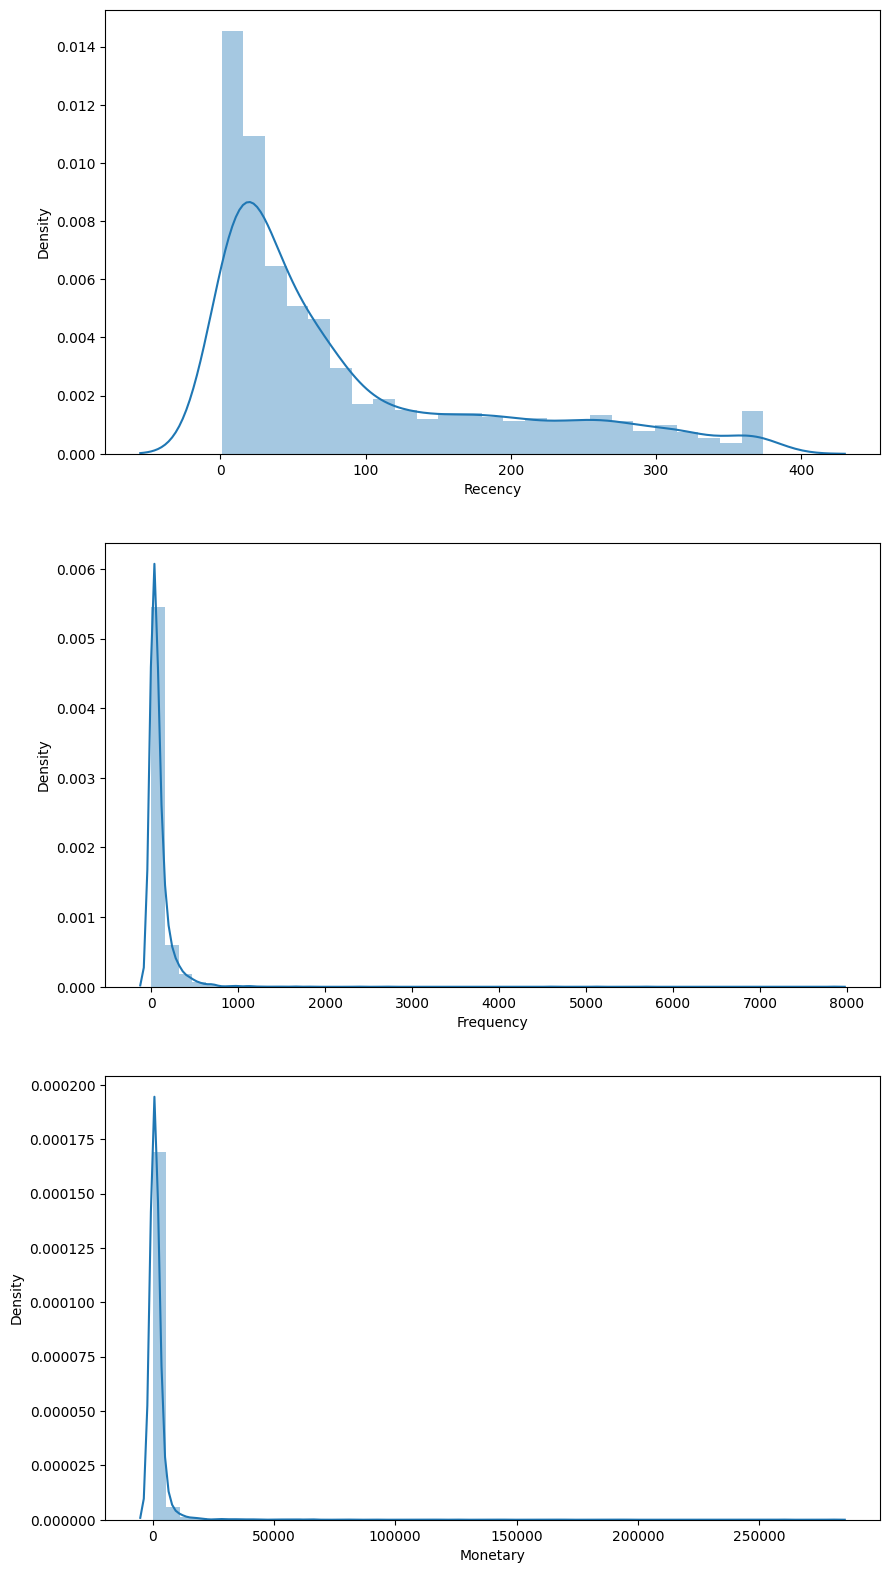

In [74]:
plt.figure(figsize=(10,20))
plt.subplot(3,1,1)
sns.distplot(rfm_df['Recency'])
plt.subplot(3,1,2)
sns.distplot(rfm_df['Frequency'])
plt.subplot(3,1,3)
sns.distplot(rfm_df['Monetary'])

R, F, M values are heavely skewed, we'll need to implement log transformation in this case to reduce the skewness.

In [75]:
rfm_df.iloc[:,:3]

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,12,178.05


In [76]:
log_rfm_df=np.log(rfm_df.iloc[:,:3])
log_rfm_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,5.786897,0.000000,11.253942
12347.0,0.693147,5.204007,8.368693
12348.0,4.317488,3.433987,7.494007
12349.0,2.944439,4.290459,7.471676
12350.0,5.736572,2.833213,5.812338


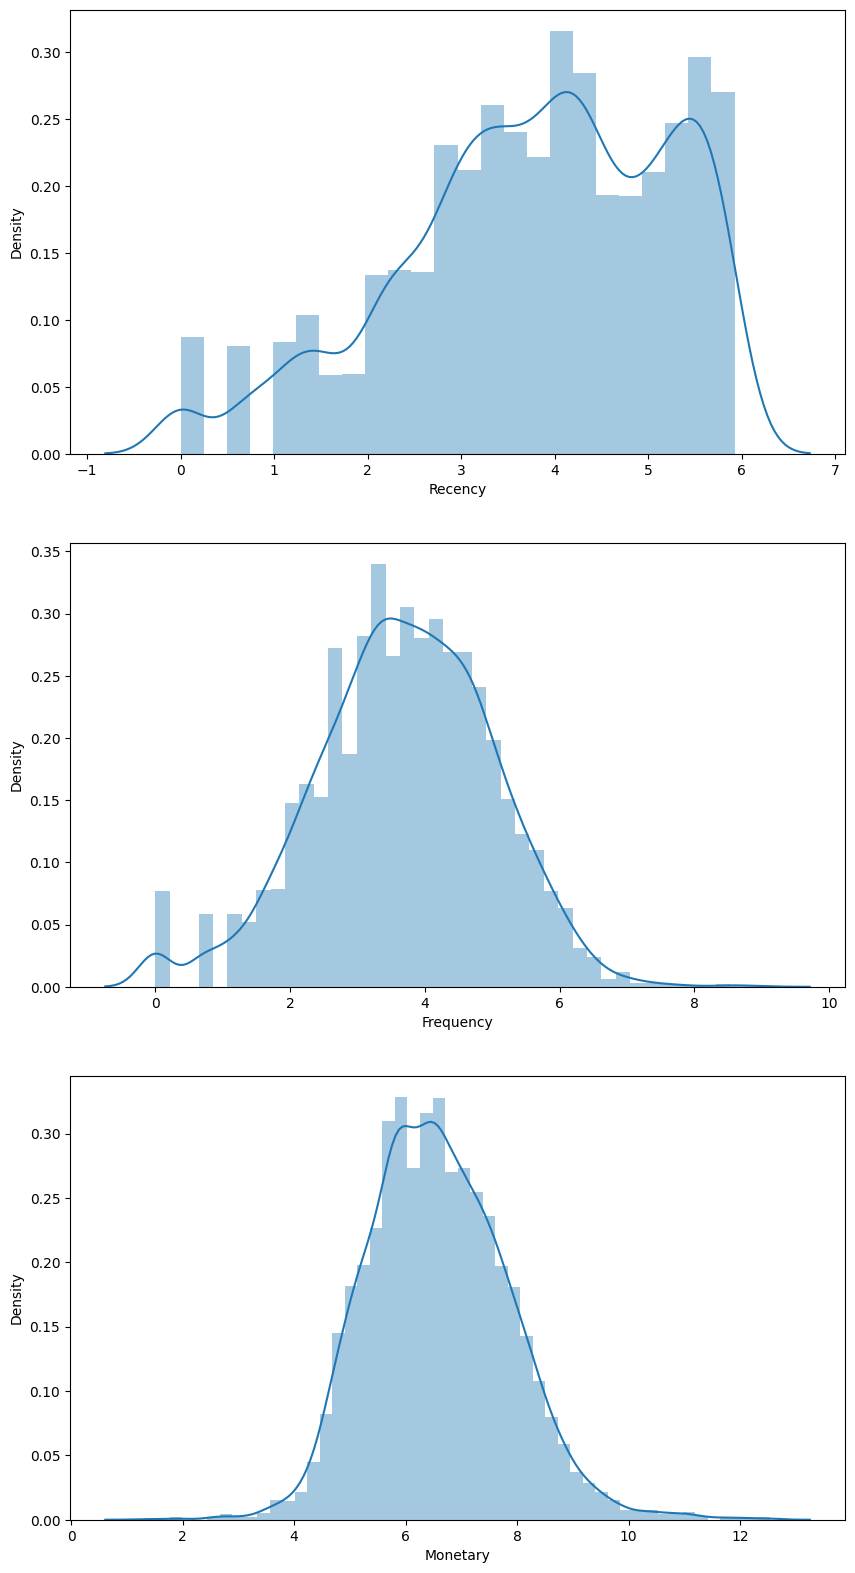

In [77]:
plt.figure(figsize=(10,20))
plt.subplot(3,1,1)
sns.distplot(log_rfm_df['Recency'])
plt.subplot(3,1,2)
sns.distplot(log_rfm_df['Frequency'])
plt.subplot(3,1,3)
sns.distplot(log_rfm_df['Monetary'])

Now the data looks almost normally distributed(almost). Next, we will use the standard scaler function to standardize the data

In [122]:
scaler=StandardScaler()

std_rfm=scaler.fit_transform(log_rfm_df)

In [123]:
std_rfm_df = pd.DataFrame(std_rfm, index = log_rfm_df.index, columns = log_rfm_df.columns)
std_rfm_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,1.409894,-2.775160,3.698719
12347.0,-2.146498,1.149549,1.410201
12348.0,0.383971,-0.185347,0.716419
12349.0,-0.574674,0.460579,0.698706
12350.0,1.374758,-0.638433,-0.617446


There are two primary methods to define number of clusters:

Elbow criterion (visual method)
Plot number of clusters against within-cluster sum-of-squared-errors (SSE) - sum of squared distances from every data point to their cluster cente

Silhouette Score (math method)
Measures intra- and inter-cluster distance

## Elbow criterion 

Text(0.5, 1.0, 'Elbow Method For Optimal k')

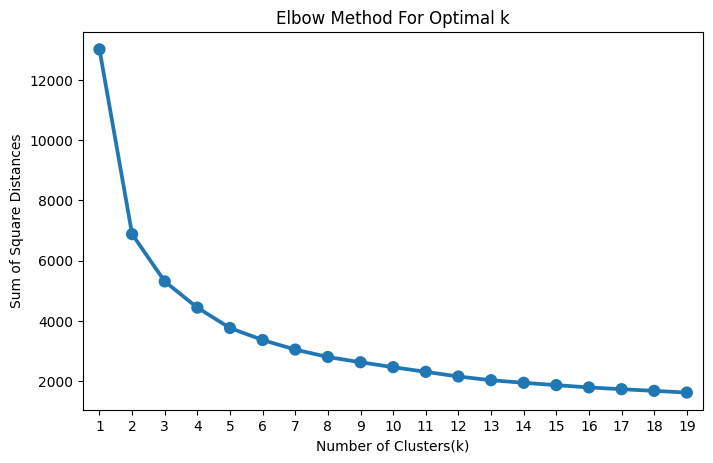

In [80]:
sum_of_sq_dist = {}
for i in range(1,20):
    km = KMeans(n_clusters= i, init = 'k-means++', max_iter= 1000, random_state=42)
    km = km.fit(std_rfm_df)
    sum_of_sq_dist[i] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')

Point at cluster = 4 has the largest angle. However, it is better to consider the point 3 and 5 as well to understand which option suits best with business reasoning.

## Silhoutte Plots

Let's check silhoutte scores as well to better understand the number of clusters.

In [ ]:
X = std_rfm

For n_clusters = 3 The average silhouette_score is : 0.3032438297110564
For n_clusters = 4 The average silhouette_score is : 0.3017281906493611
For n_clusters = 5 The average silhouette_score is : 0.2775720058150089
For n_clusters = 6 The average silhouette_score is : 0.2763975347340967
For n_clusters = 7 The average silhouette_score is : 0.26273646415166896


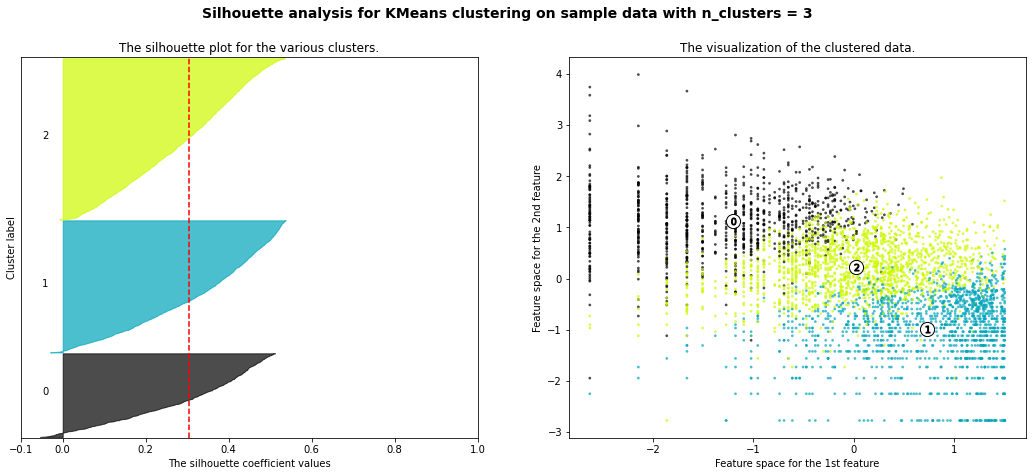

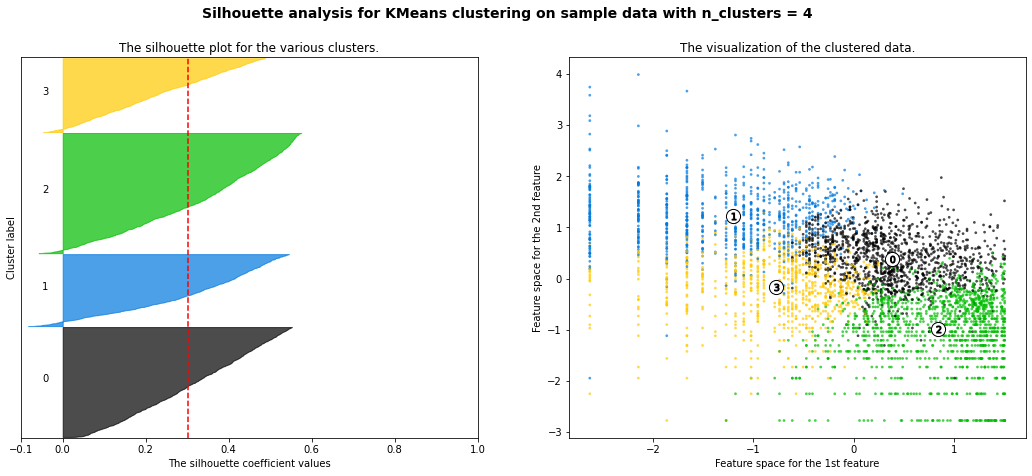

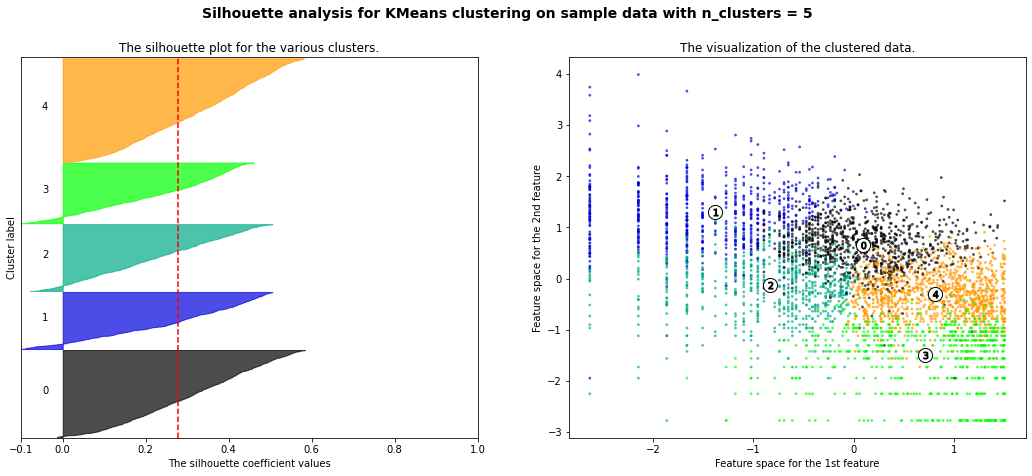

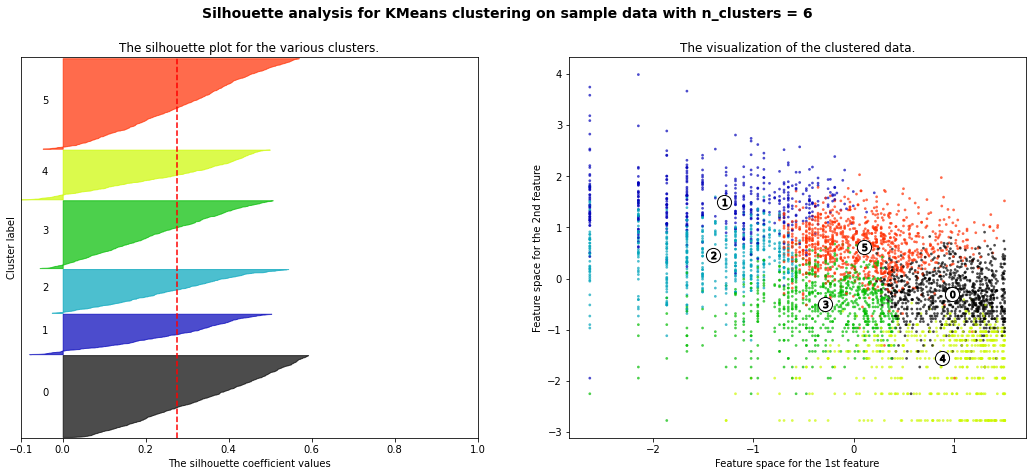

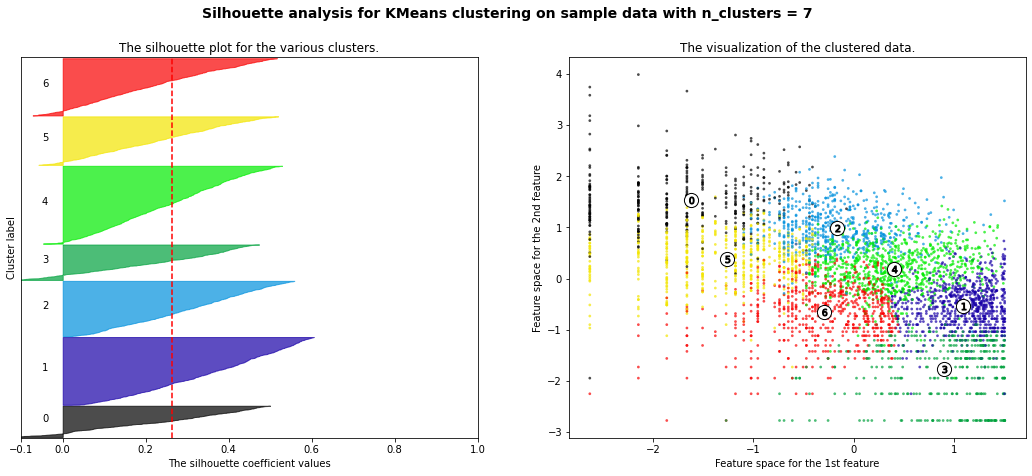

In [ ]:
range_n_clusters = [3,4,5,6,7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

# plt.show()

## checking K values

Checking distribution for K values 3, 4, and 5.

### k = 3

In [153]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(std_rfm_df)
cluster_labels_k3 = kmeans.labels_

# checking cluster labelwise avg. R F M values and counts.
rfm_df_k3 = rfm_df.assign(Cluster = cluster_labels_k3)
rfm_df_k3.groupby(['Cluster']).agg({'Recency': 'mean','Frequency': 'mean','Monetary': ['mean', 'count'],}).round(0)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0          13.0     263.0   6565.0   956
1         171.0      15.0    295.0  1524
2          69.0      66.0   1177.0  1858

In [154]:
# Adding cluster labels to standardize df for 3d plotting
std_rfm_df_k3 = std_rfm_df.assign(Cluster = cluster_labels_k3)
std_rfm_df_k3.head()

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346.0,1.409894,-2.775160,3.698719,2
12347.0,-2.146498,1.149549,1.410201,0
12348.0,0.383971,-0.185347,0.716419,2
12349.0,-0.574674,0.460579,0.698706,2
12350.0,1.374758,-0.638433,-0.617446,1


,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346.0,1.409894,-2.775160,3.698719,2
1,12347.0,-2.146498,1.149549,1.410201,0
2,12348.0,0.383971,-0.185347,0.716419,2
3,12349.0,-0.574674,0.460579,0.698706,2
4,12350.0,1.374758,-0.638433,-0.617446,1
...,...,...,...,...,...
4333,18280.0,1.298690,-1.038617,-1.106086,1
4334,18281.0,0.999081,-1.307611,-1.743850,1
4335,18282.0,-1.178605,-0.901116,-1.117365,1
4336,18283.0,-1.662552,2.223515,0.837969,0


Text(0.5, 0, 'Monetary')

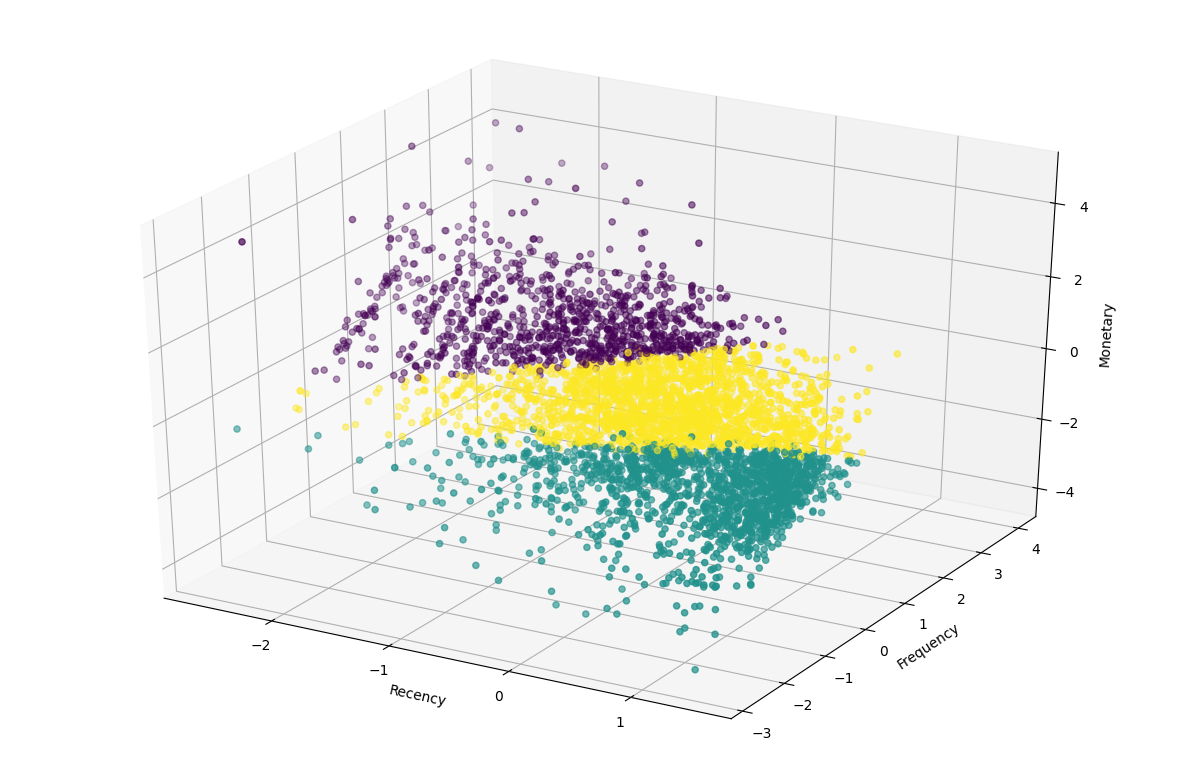

In [198]:
fig=plt.figure(figsize=(15,10))

# plt.title('3d visualization of Recency Frequency and Monetary')

ax = plt.axes(projection='3d')

xs=std_rfm_df_k3.Recency
ys=std_rfm_df_k3.Frequency
zs=std_rfm_df_k3.Monetary
ax.scatter3D(xs,ys,zs, c=std_rfm_df_k3.Cluster, marker = 'o')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

### k = 4

In [155]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(std_rfm_df)
cluster_labels_k4 = kmeans.labels_


rfm_df_k4 = rfm_df.assign(Cluster = cluster_labels_k4)
rfm_df_k4.groupby(['Cluster']).agg({'Recency': 'mean','Frequency': 'mean','Monetary': ['mean', 'count'],}).round(0)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0          19.0      41.0    631.0   851
1         182.0      15.0    294.0  1383
2          12.0     288.0   7252.0   833
3          97.0      81.0   1516.0  1271

In [156]:
# Adding cluster labels to standardize df for 3d plotting
std_rfm_df_k4 = std_rfm_df.assign(Cluster = cluster_labels_k4)
std_rfm_df_k4.head()

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346.0,1.409894,-2.775160,3.698719,3
12347.0,-2.146498,1.149549,1.410201,2
12348.0,0.383971,-0.185347,0.716419,3
12349.0,-0.574674,0.460579,0.698706,3
12350.0,1.374758,-0.638433,-0.617446,1


Text(0.5, 0, 'Monetary')

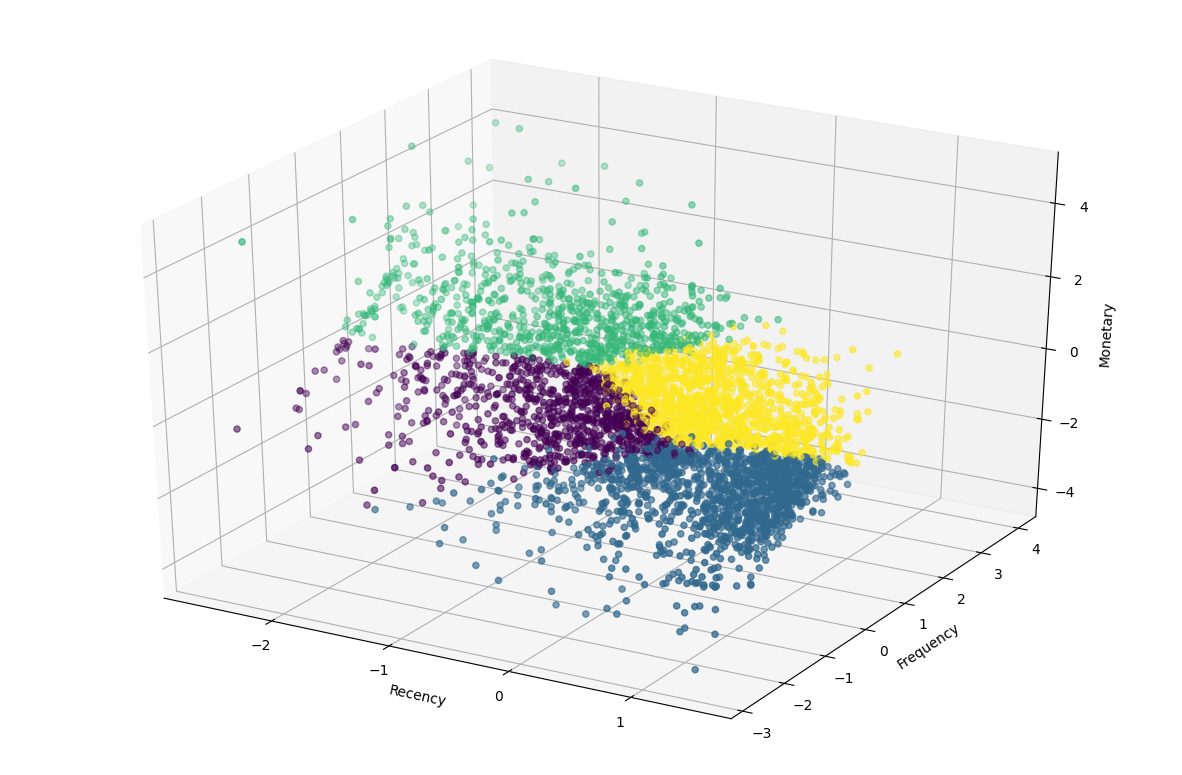

In [165]:
fig=plt.figure(figsize=(15,10))

# plt.title('3d visualization of Recency Frequency and Monetary')

ax = plt.axes(projection='3d')

xs=std_rfm_df_k4.Recency
ys=std_rfm_df_k4.Frequency
zs=std_rfm_df_k4.Monetary
ax.scatter3D(xs,ys,zs, c=std_rfm_df_k4.Cluster, marker = 'o')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')


### k = 5

In [157]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(std_rfm_df)
cluster_labels_k5 = kmeans.labels_


rfm_df_k5 = rfm_df.assign(Cluster = cluster_labels_k5)
rfm_df_k5.groupby(['Cluster']).agg({'Recency': 'mean','Frequency': 'mean','Monetary': ['mean', 'count'],}).round(0)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0          17.0      42.0    646.0   772
1         168.0       7.0    200.0   703
2          64.0     112.0   2076.0  1006
3           9.0     320.0   8418.0   661
4         167.0      31.0    518.0  1196

In [158]:
# Adding cluster labels to standardize df for 3d plotting
std_rfm_df_k5 = std_rfm_df.assign(Cluster = cluster_labels_k5)
std_rfm_df_k5.head()

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346.0,1.409894,-2.775160,3.698719,2
12347.0,-2.146498,1.149549,1.410201,3
12348.0,0.383971,-0.185347,0.716419,2
12349.0,-0.574674,0.460579,0.698706,2
12350.0,1.374758,-0.638433,-0.617446,4


Text(0.5, 0, 'Monetary')

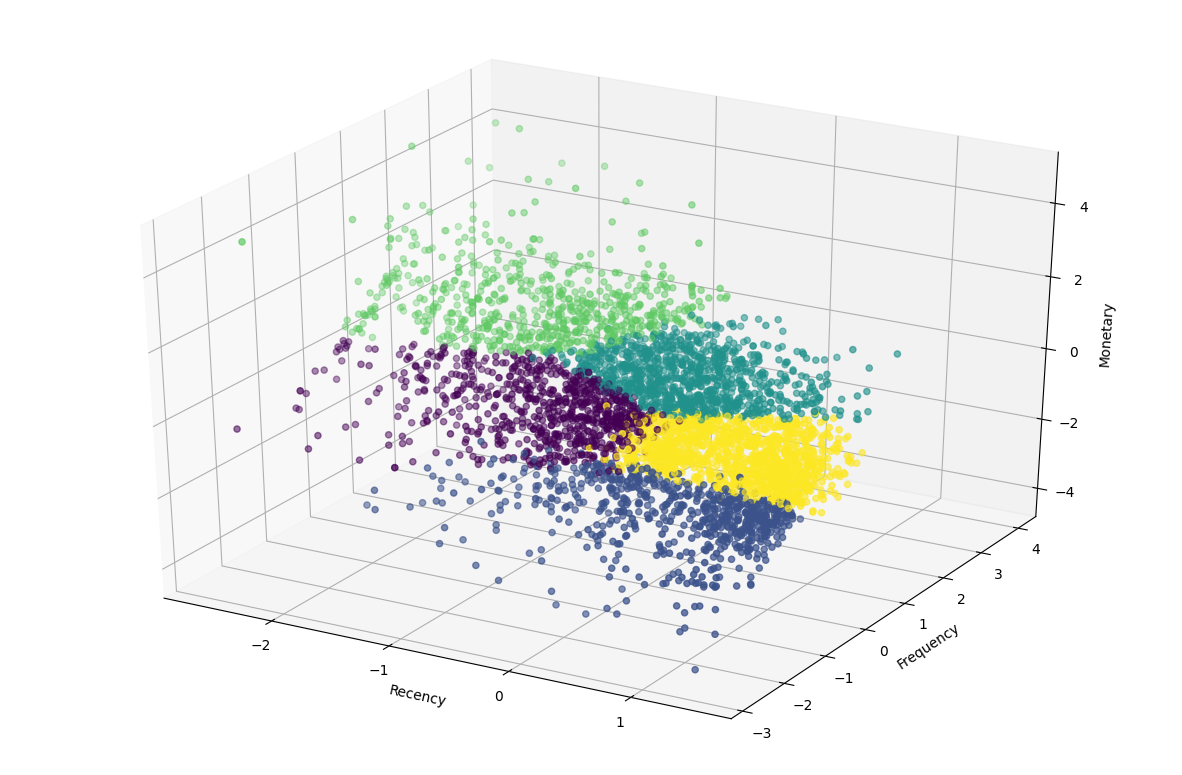

In [166]:
fig=plt.figure(figsize=(15,10))

# plt.title('3d visualization of Recency Frequency and Monetary')

ax = plt.axes(projection='3d')

xs=std_rfm_df_k5.Recency
ys=std_rfm_df_k5.Frequency
zs=std_rfm_df_k5.Monetary
ax.scatter3D(xs,ys,zs, c=std_rfm_df_k5.Cluster, marker = 'o')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')


# Hierarchical clustering

In [199]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch

In [223]:
X

array([[ 1.40989446, -2.77515957,  3.69871931],
       [-2.14649825,  1.1495495 ,  1.410201  ],
       [ 0.38397128, -0.18534723,  0.71641884],
       ...,
       [-1.17860486, -0.90111592, -1.11736527],
       [-1.66255156,  2.22351465,  0.83796882],
       [-0.00442205,  0.42893082,  0.73389579]])

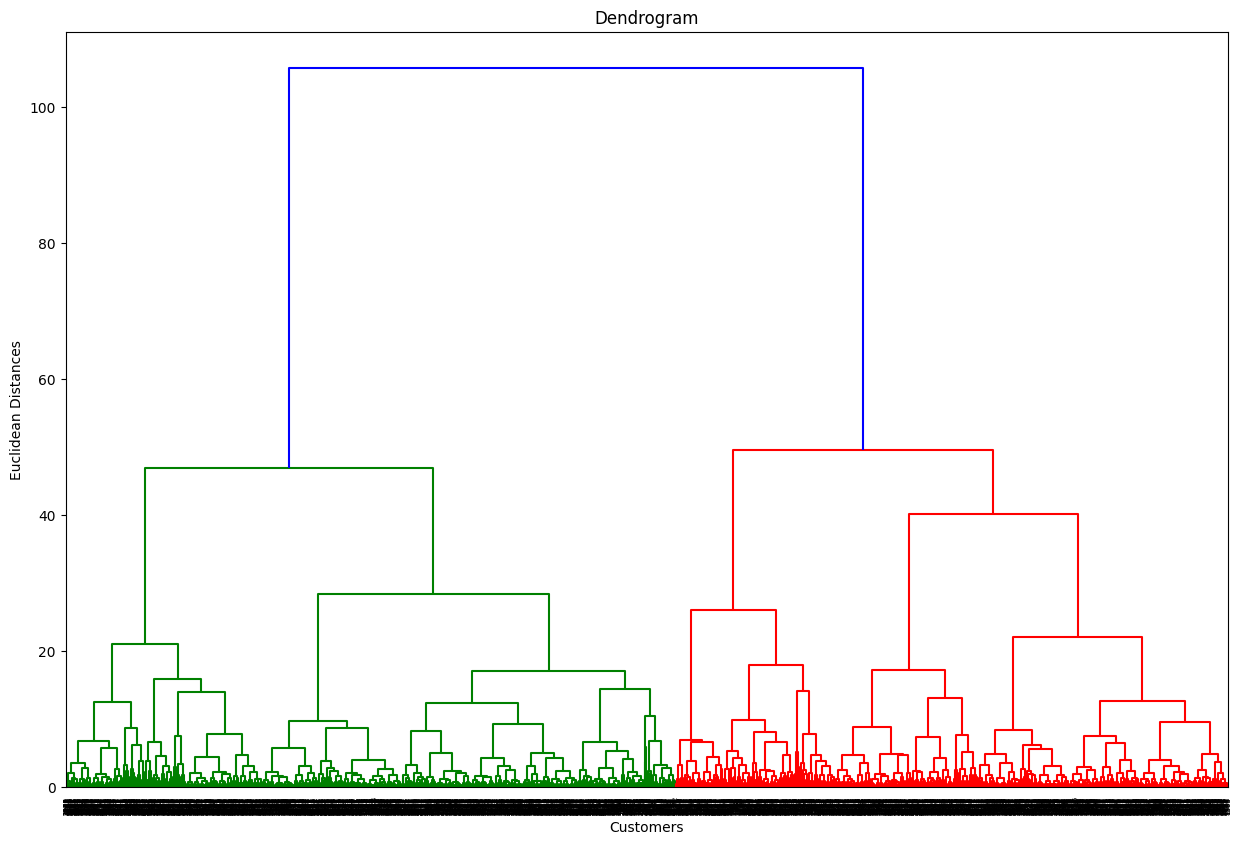

In [201]:
plt.figure(figsize=(15,10))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
# plt.show() # find largest vertical distance we can make without crossing any other horizontal line

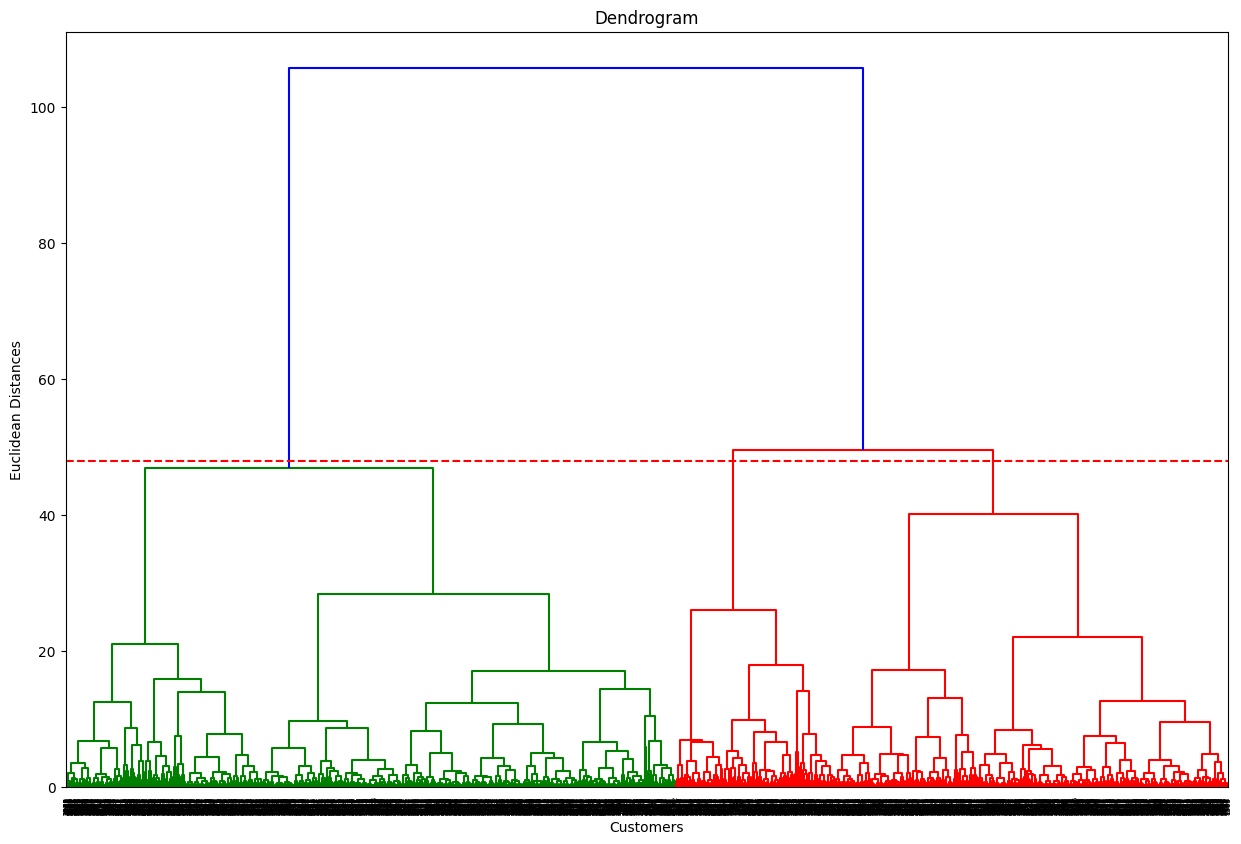

In [219]:
plt.figure(figsize=(15,10))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=48, color='r', linestyle='--')
# plt.show() # find largest vertical distance we can make without crossing any other horizontal line

In [203]:
from sklearn.cluster import AgglomerativeClustering

In [230]:
# Fitting hierarchical clustering to the mall dataset

hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')

In [231]:
y_hc = hc.fit_predict(X)

In [232]:
np.unique(y_hc,return_counts=True)

(array([0, 1, 2]), array([2276, 1468,  594]))

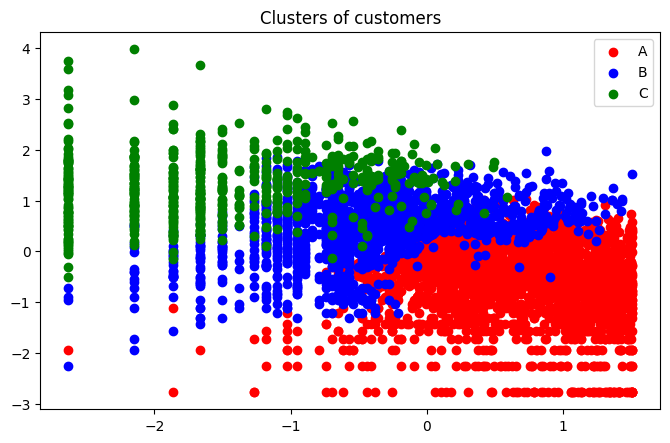

In [233]:
# Visualizing the clusters (two dimensions only)
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], c = 'red', label = 'A')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], c = 'blue', label = 'B')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], c = 'green', label = 'C')
# plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], c = 'cyan', label = 'D')
# plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Sensible')
plt.title('Clusters of customers')
# plt.xlabel('Annual Income (k$)')
# plt.ylabel('Spending Score (1-100)')
plt.legend()
# plt.show()

# K = 3 is Final!

K = 3 looks optimal in this case, considering the all above parameters and plots.

In [ ]:
# checking cluster labelwise avg. R F M values and counts.
rfm_df_k3 = rfm_df.assign(Cluster = cluster_labels_k3)
rfm_df_k3.groupby(['Cluster']).agg({'Recency': 'mean','Frequency': 'mean','Monetary': ['mean', 'count'],}).round(0)

In [ ]:
rfm_df_k3

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Group,RFM_Score,Segments,Cluster
CustomerID,,,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,6,Silver,2
12347.0,2,182,4310.00,4,4,4,444,12,Diamond,0
12348.0,75,31,1797.24,2,2,4,224,8,Gold,2
12349.0,19,73,1757.55,3,3,4,334,10,Platinum,2
12350.0,310,17,334.40,1,1,2,112,4,Bronze,1
...,...,...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,111,3,Bronze,1
18281.0,181,7,80.82,1,1,1,111,3,Bronze,1
18282.0,8,12,178.05,4,1,1,411,6,Silver,1


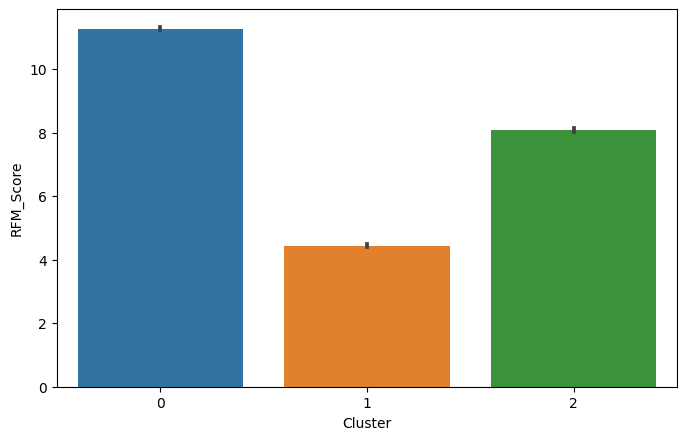

In [ ]:
# clusterwise avg. RFM score
sns.barplot(rfm_df_k3.Cluster, rfm_df_k3.RFM_Score)

# Final DF

In [ ]:
final_df = pd.merge(df, std_rfm_df_k3.reset_index(), how = 'left', on = 'CustomerID').drop(['Recency', 'Frequency', 'Monetary'], axis = 1)

In [ ]:
final_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmt,Cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2


It is a good practice to perform a deep dive and understand why K-means thinks customers of a particular group belong together (yes, sadly K-means is unable to write us a marketing report on their segmentation decision yet).

K-means is a simple but powerful segmentation method. Anyone doing customer or market segmentation should use this to augment traditional methods. Otherwise, they risk becoming obsolete in the age of artificial intelligence.